In [42]:
pip install keras

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 1.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.0 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 989.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.9 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.9 MB 885.1 kB/s eta 0:00:03
   ---------- ----------------------------- 0.8/2.9 MB 1.

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-21, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.487352,2.579567,2.378775,2.478923,897427216
2004-08-20,2.684922,2.704009,2.491318,2.503960,458857488
2004-08-23,2.711942,2.813082,2.703266,2.745408,366857939
2004-08-24,2.599647,2.766478,2.567420,2.757554,306396159
2004-08-25,2.627658,2.677238,2.575105,2.601877,184645512


In [6]:
google_data.shape

(5193, 5)

In [7]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5193.000000,5193.000000,5193.000000,5193.000000,5.193000e+03
mean,49.366251,49.872882,48.848630,49.346854,1.125426e+08
std,48.438333,48.956817,47.924306,48.412753,1.482968e+08
min,2.479170,2.522056,2.378775,2.458844,1.584340e+05
25%,13.114990,13.261990,12.977162,13.113007,2.646000e+07
50%,27.809566,28.084508,27.595175,27.873589,5.136600e+07
75%,66.535858,67.194733,65.812779,66.357695,1.375898e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5193 entries, 2004-08-19 to 2025-04-08
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5193 non-null   float64
 1   (High, GOOG)    5193 non-null   float64
 2   (Low, GOOG)     5193 non-null   float64
 3   (Open, GOOG)    5193 non-null   float64
 4   (Volume, GOOG)  5193 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 243.4 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


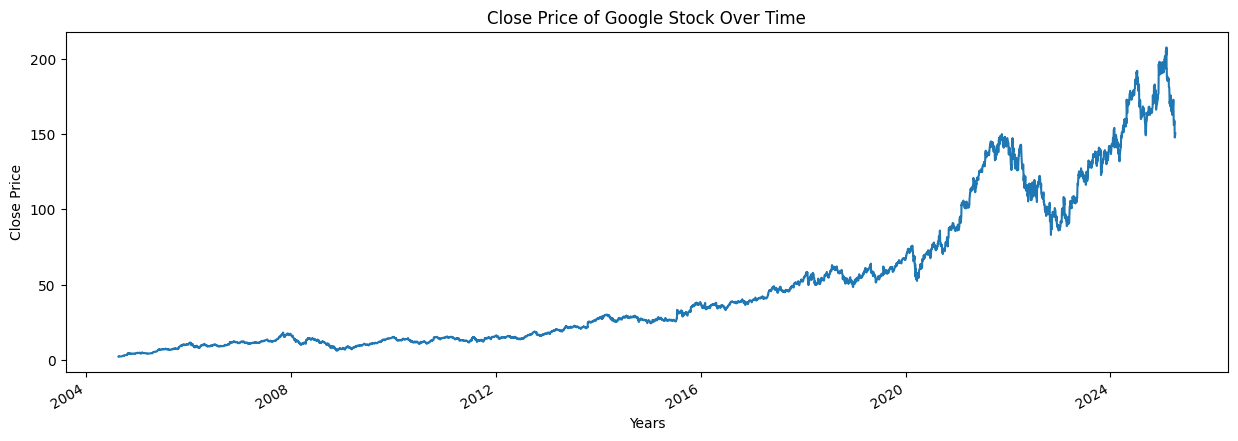

In [14]:
plt.figure(figsize=(15, 5))
google_data[('Close', 'GOOG')].plot()

# Adding labels and title
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Close Price of Google Stock Over Time")

# Display the plot
plt.show()


In [15]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [16]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

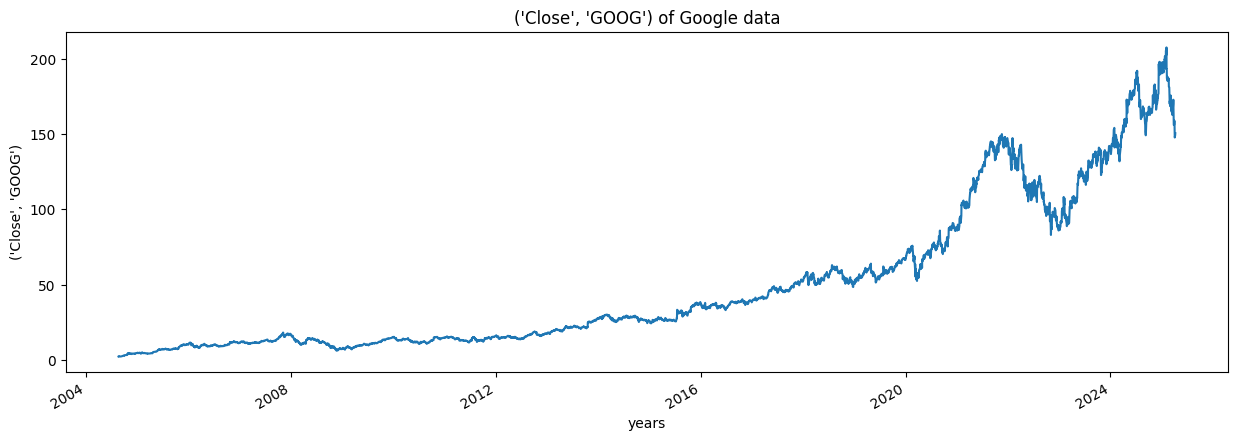

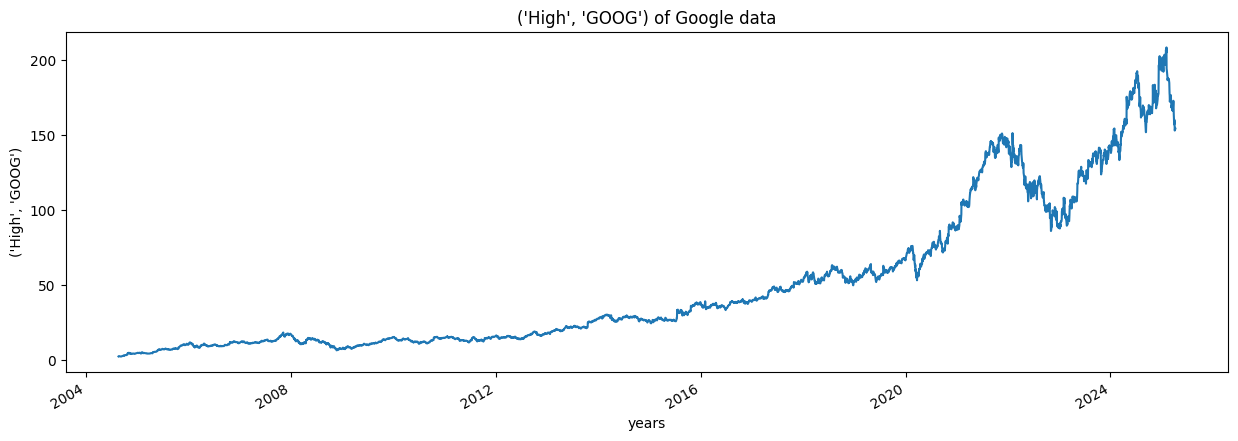

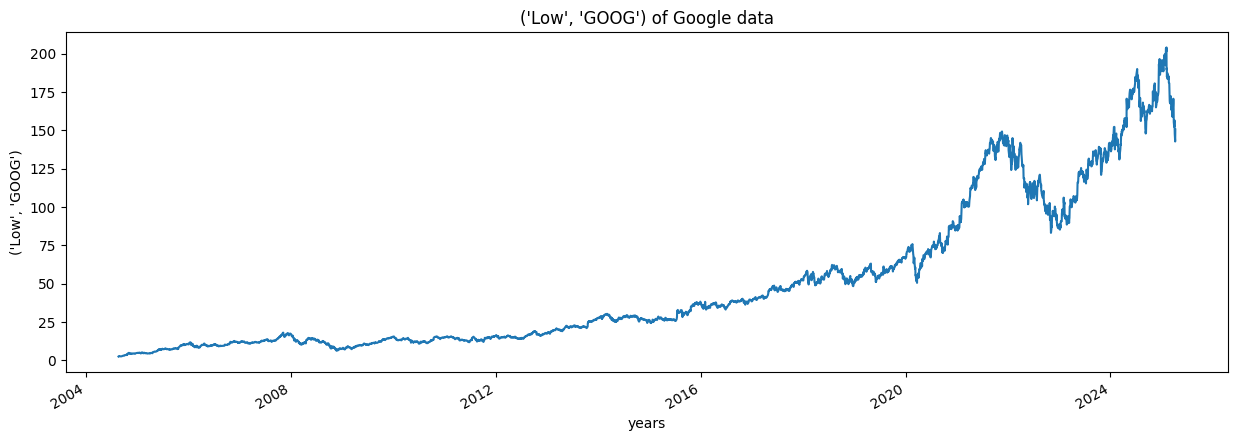

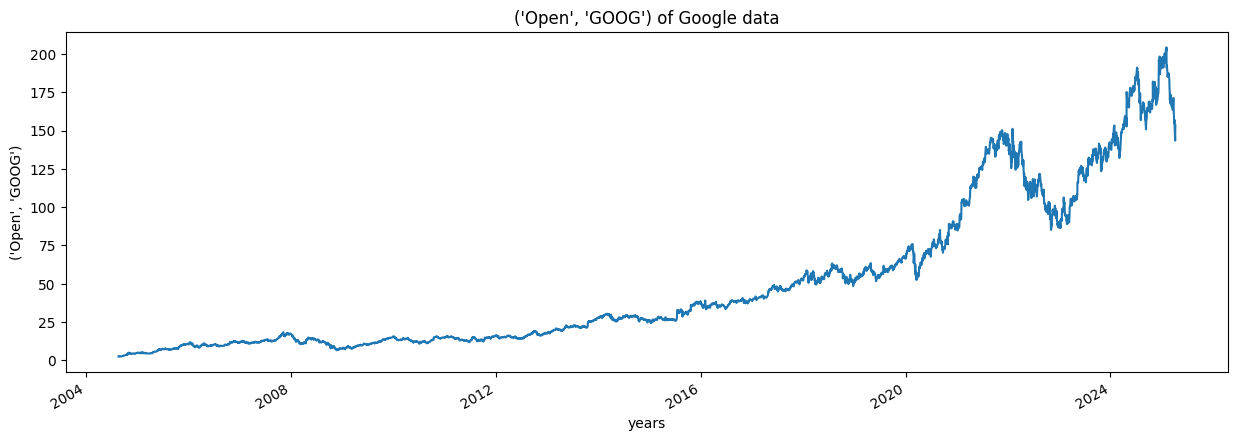

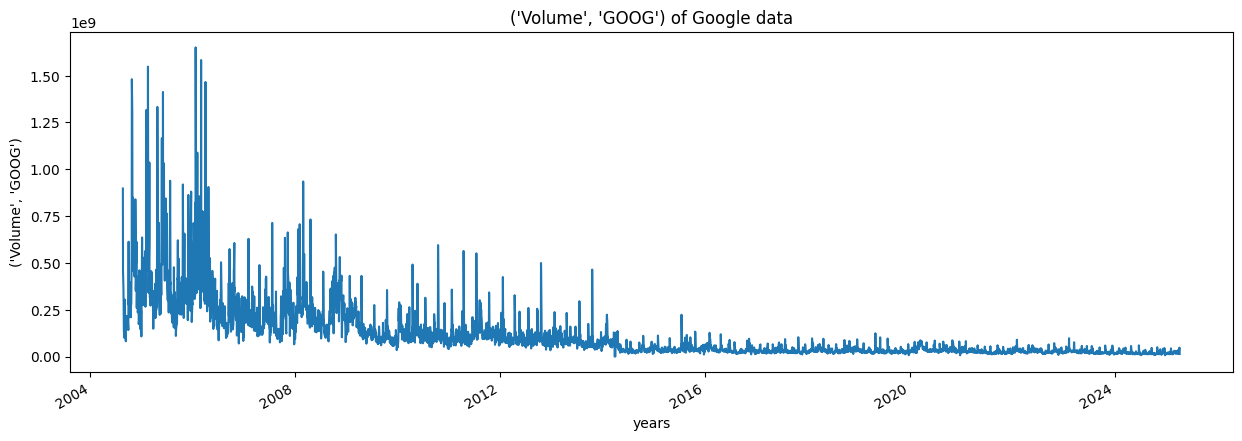

In [17]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [18]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [19]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [20]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [21]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [22]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [23]:
# Calculate the 250-day moving average for the 'Close' price of 'GOOG'
google_data[('MA_for_250_days', 'GOOG')] = google_data[('Close', 'GOOG')].rolling(252).mean()


In [24]:
google_data['MA_for_250_days'][0:252].tail()

Ticker,GOOG
Date,
2005-08-11,NaN
2005-08-12,NaN
2005-08-15,NaN
2005-08-16,NaN
2005-08-17,5.026688


<Figure size 640x480 with 0 Axes>

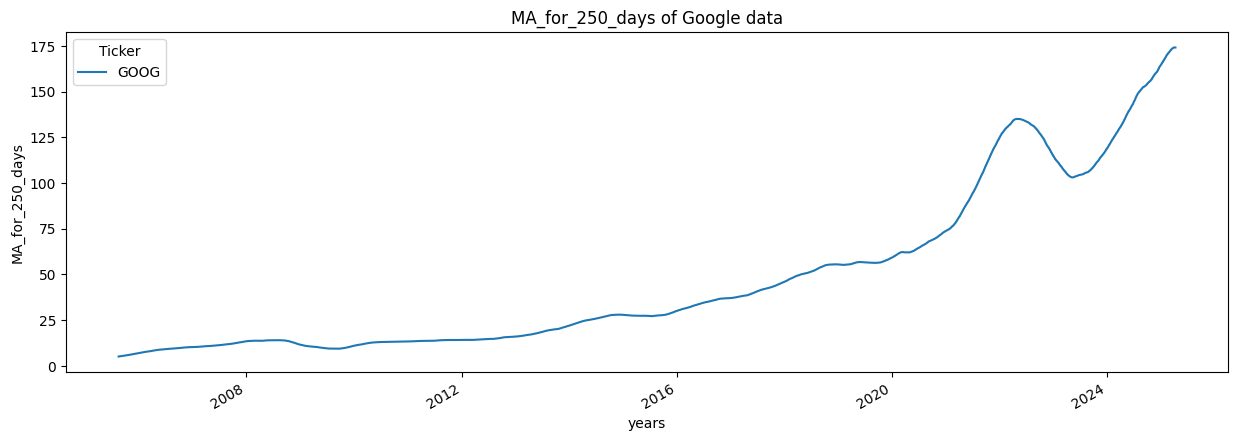

In [25]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

MultiIndex([(          'Close', 'GOOG'),
            (           'High', 'GOOG'),
            (            'Low', 'GOOG'),
            (           'Open', 'GOOG'),
            (         'Volume', 'GOOG'),
            ('MA_for_250_days', 'GOOG')],
           names=['Price', 'Ticker'])


<Figure size 640x480 with 0 Axes>

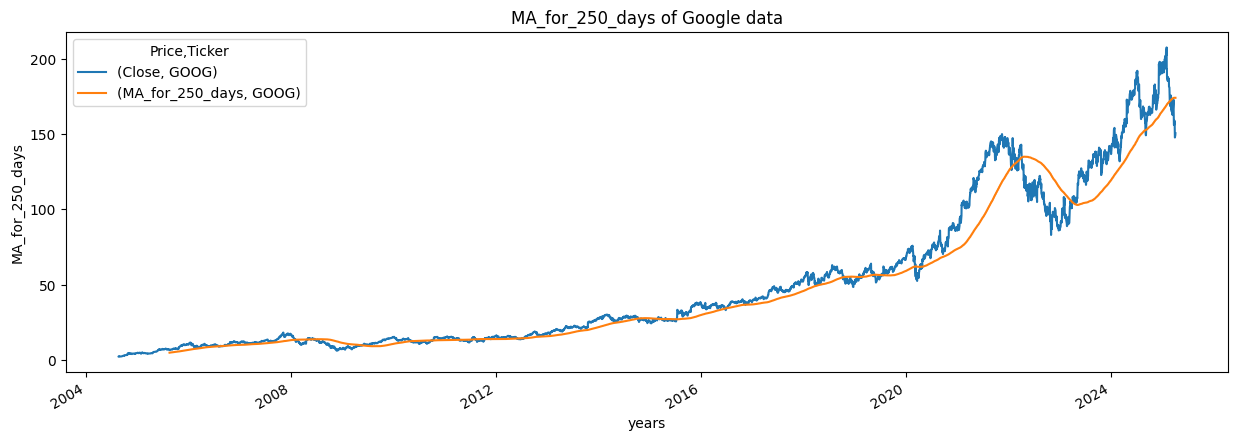

In [26]:
# Inspect columns to ensure exact column names
print(google_data.columns)

# Plot the graph with the corrected multi-index column references
plot_graph((15, 5), google_data[[( 'Close', 'GOOG'), ('MA_for_250_days', 'GOOG')]], 'MA_for_250_days')


MultiIndex([(          'Close', 'GOOG'),
            (           'High', 'GOOG'),
            (            'Low', 'GOOG'),
            (           'Open', 'GOOG'),
            (         'Volume', 'GOOG'),
            ('MA_for_250_days', 'GOOG')],
           names=['Price', 'Ticker'])


<Figure size 640x480 with 0 Axes>

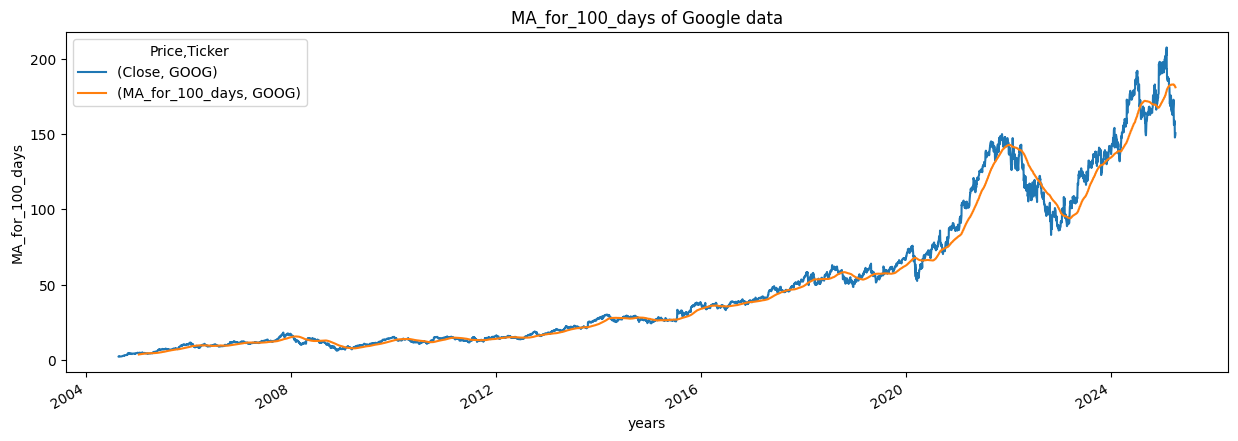

In [27]:
# Inspect columns to see exact structure
print(google_data.columns)

# Calculate the moving average based on 'Close' price (using the correct MultiIndex reference)
google_data[('MA_for_100_days', 'GOOG')] = google_data[('Close', 'GOOG')].rolling(100).mean()

# Plot the graph with the 'Close' and 'MA_for_100_days' columns
plot_graph((15,5), google_data[[('Close', 'GOOG'), ('MA_for_100_days', 'GOOG')]], 'MA_for_100_days')


<Figure size 640x480 with 0 Axes>

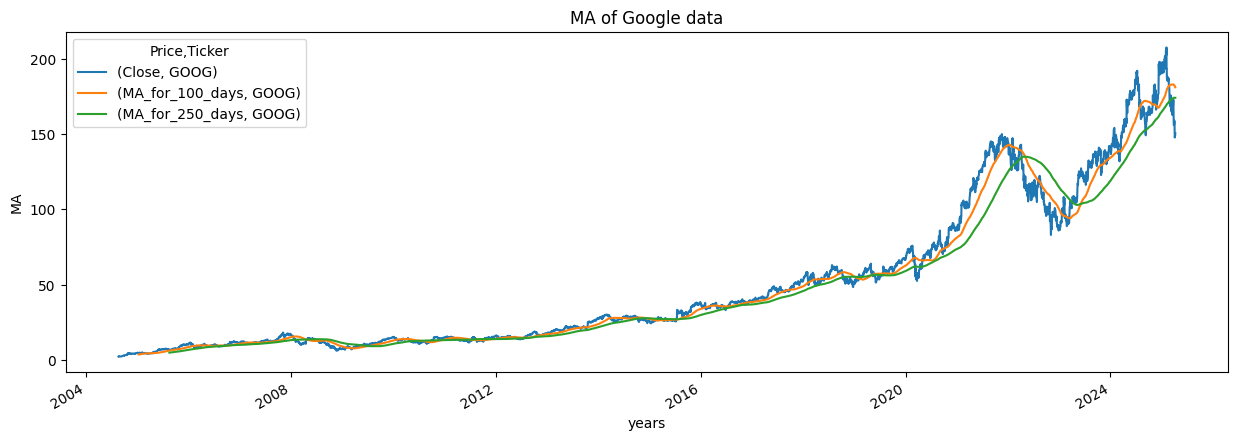

In [28]:

# Update to use the 'Close' column instead of 'Adj Close'
plot_graph((15, 5), google_data[[('Close', 'GOOG'), ('MA_for_100_days', 'GOOG'), ('MA_for_250_days', 'GOOG')]], 'MA')



In [29]:
google_data[('percentage_change_cp', 'GOOG')] = google_data[('Close', 'GOOG')].pct_change()


<Figure size 640x480 with 0 Axes>

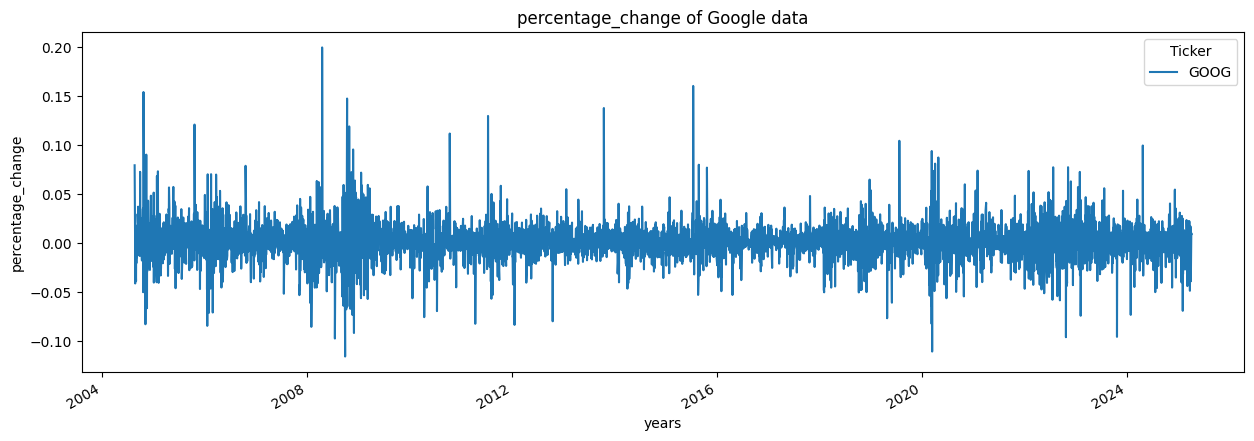

In [30]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')


In [31]:
Adj_close_price = google_data[('Close', 'GOOG')]


In [32]:
max_value = max(Adj_close_price.values)
min_value = min(Adj_close_price.values)
print(max_value, min_value)


207.4736328125 2.479170322418213


In [33]:
from sklearn.preprocessing import MinMaxScaler

# Assuming Adj_close_price is a pandas Series, reshape it to be 2D
Adj_close_price_2d = Adj_close_price.values.reshape(-1, 1)

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(Adj_close_price_2d)


In [34]:
len(scaled_data)

5193

In [35]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [36]:
x_data[0],y_data[0]

(array([[3.99111852e-05],
        [1.00369373e-03],
        [1.13550323e-03],
        [5.87704880e-04],
        [7.24351492e-04],
        [9.55321368e-04],
        [7.42490402e-04],
        [2.41856014e-04],
        [2.85388933e-04],
        [2.90250477e-05],
        [1.81392592e-04],
        [0.00000000e+00],
        [1.89857262e-04],
        [2.76925426e-04],
        [2.78133834e-04],
        [6.43331181e-04],
        [9.05739432e-04],
        [1.38823956e-03],
        [1.44990907e-03],
        [1.68813171e-03],
        [2.11379714e-03],
        [2.33992873e-03],
        [2.15612048e-03],
        [2.22141754e-03],
        [2.51648187e-03],
        [2.39676344e-03],
        [2.20691083e-03],
        [3.24687540e-03],
        [3.75718520e-03],
        [3.57821291e-03],
        [3.93857546e-03],
        [4.23846994e-03],
        [4.63873554e-03],
        [4.48274393e-03],
        [4.69677982e-03],
        [4.56134510e-03],
        [4.26265671e-03],
        [4.52143973e-03],
        [4.9

In [37]:

int(len(x_data)*0.7)

3565

In [38]:
4908-100-int(len(x_data)*0.7)

1243

In [39]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3565, 100, 1)
(3565, 1)
(1528, 100, 1)
(1528, 1)


In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3542/3542 ━━━━━━━━━━━━━━━━━━━━ 76s 21ms/step - loss: 2.1595e-04 
Epoch 2/2
3542/3542 ━━━━━━━━━━━━━━━━━━━━ 73s 21ms/step - loss: 4.8737e-05 


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step  


In [ ]:
predictions

array([[0.27198163],
       [0.26799756],
       [0.26484686],
       ...,
       [0.9299738 ],
       [0.93078053],
       [0.93018985]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 58.300243],
       [ 57.4826  ],
       [ 56.83599 ],
       ...,
       [193.33867 ],
       [193.50423 ],
       [193.38301 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 54.73881912],
       [ 54.55696869],
       [ 54.55448151],
       ...,
       [187.13000488],
       [186.63999939],
       [181.58000183]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [ ]:
rmse

np.float64(6.017848107615399)

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-02-07,54.738819,58.300243
2019-02-08,54.556969,57.482601
2019-02-11,54.554482,56.835991
2019-02-12,55.867760,56.537437
2019-02-13,55.807476,57.096123


<Figure size 640x480 with 0 Axes>

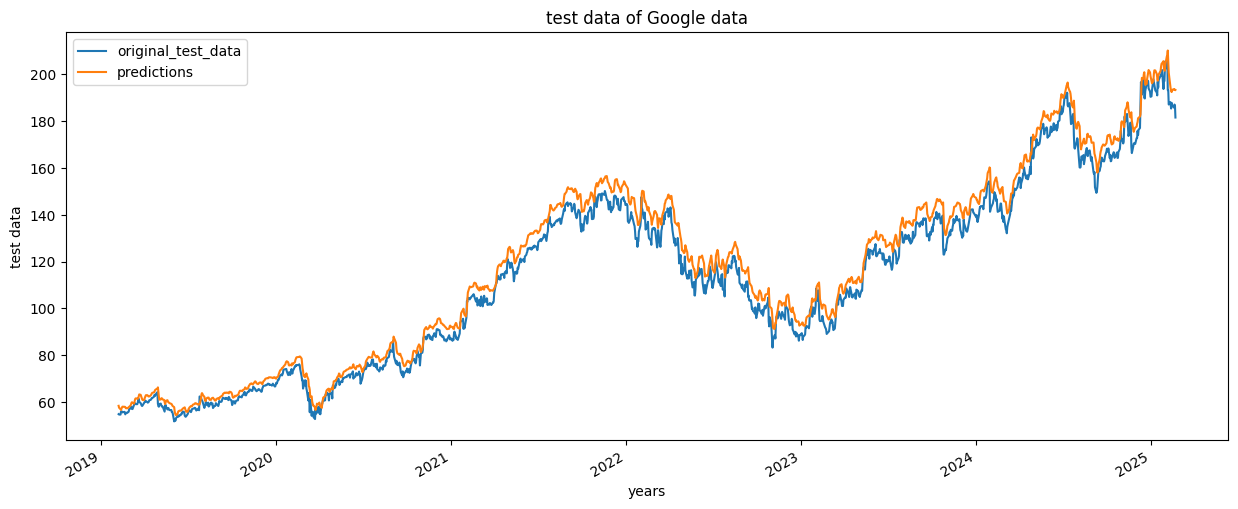

In [ ]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

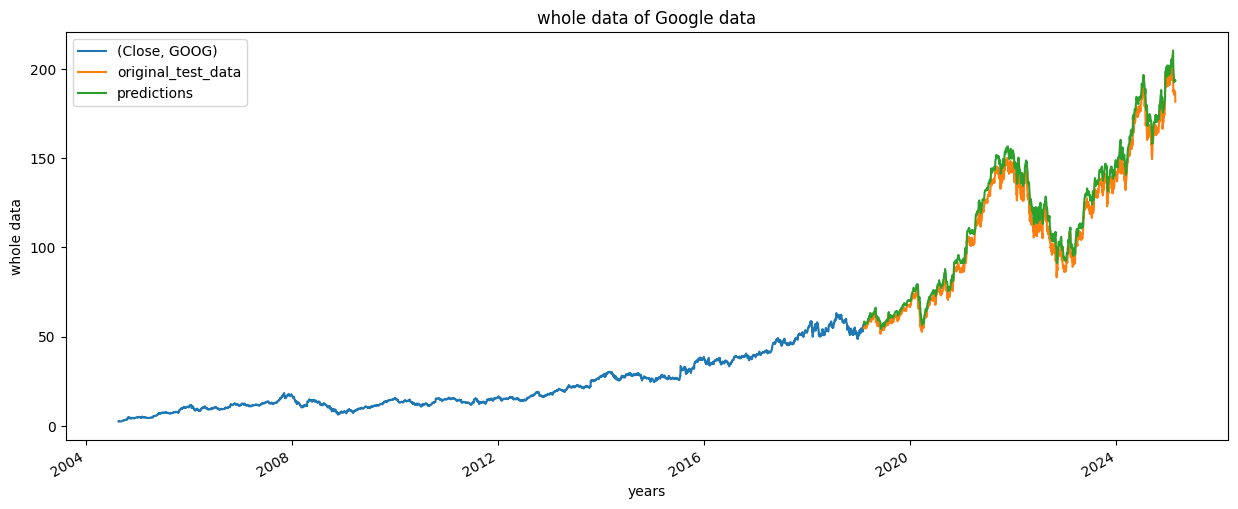

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")